<a href="https://colab.research.google.com/github/RSMZP/Behavioral-Study/blob/main/Civil_Servants_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
path = "/content/Parameters.xlsx"

In [ ]:
data = pd.read_excel(path)

In [ ]:
data.columns

Index(['Submission Date', 'First Name', 'Last Name', 'Department',
       'Led By (G = Generalists (IAS)/ S= Speacialists(All other services)',
       'Civil Service you belong to', 'Genuine Concern for Others(Tf)',
       'Spends time teaching and coaching (Tf)',
       'Political Sensitivity and Skills(Tc)',
       'Decisiveness Determination and Self Confidence (Tf)',
       'Integrity, trustworthiness, honesty and openness (Tf)',
       'Networks with different offices to get the work done (Tc)',
       'Accessibility and approachibility (Tc)',
       'Encourages me to think more creatively (Tf)',
       'Gets me to rethink never questioned ideas(Tf)',
       'Tell us standards to carry out the work(Tc)',
       'Views me as having different needs, abilities, and aspirations (Tf)',
       'Monitors my performance and keeps track of mistake (Tc)',
       'Will take action before problems are chronic (Tc)',
       'Scope of Corrupt Practices (Tc)', 'Works out agreements with me (Tf)'

In [ ]:
data.shape

(324, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 22 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Submission Date                                                                 324 non-null    object
 1   First Name                                                                      324 non-null    object
 2   Last Name                                                                       324 non-null    object
 3   Department                                                                      324 non-null    object
 4   Led By (G = Generalists (IAS)/ S= Speacialists(All other services)              324 non-null    object
 5   Civil Service you belong to                                                     324 non-null    object
 6   Genuine Concern for Others

In [ ]:
from collections import Counter


Counter({'29 Year.': 2,
         '30 years': 2,
         "All india Group' A' Services": 1,
         'Central Force': 1,
         'Central Government': 2,
         'Central Government assistant professor': 1,
         'Central Secretariat Services': 1,
         'Class-2': 1,
         'Css': 1,
         'DANICS': 2,
         'Frieght, Parcel and Passenger Transport.': 1,
         'Government': 3,
         'Govt.Service': 1,
         'IA&AS': 29,
         'IAS': 69,
         'IES': 2,
         'IFS': 3,
         'IPS': 22,
         'IPoS': 1,
         'IRAS': 1,
         'IRS': 8,
         'IRSEE': 1,
         'IRTS': 1,
         'Indian Accounts and Auditing Services': 15,
         'Indian Administrative Services': 28,
         'Indian Administrative services': 10,
         'Indian Audit & Accounts Services': 1,
         'Indian Audit and Accounts Services': 2,
         'Indian Civil Account Services': 1,
         'Indian Corporate Law Service': 4,
         'Indian Corporate Law Service

In [ ]:
data = data.iloc[:,4:].drop("Civil Service you belong to",axis=1)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


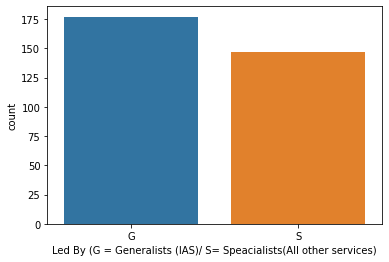

In [ ]:
sns.countplot(data["Led By (G = Generalists (IAS)/ S= Speacialists(All other services)"])

In [ ]:
Counter(data["Led By (G = Generalists (IAS)/ S= Speacialists(All other services)"])

Counter({'G': 177, 'S': 147})

In [ ]:
data["Genuine Concern for Others(Tf)"].unique()

array(['Very satisfied', 'Satisfied', 'Neutral', 'Unsatisfied',
       'Very unsatisfied'], dtype=object)

In [ ]:
rep = {'Very satisfied':5, 'Satisfied':4, 'Neutral':3, 'Unsatisfied':2,
       'Very unsatisfied':1}

In [ ]:
data_ = data.replace(rep)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df = data_.iloc[:,1:]
corr=df.corr(method="spearman")
plt.figure(figsize=(12,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True,mask=mask, fmt='.2g', linewidths=0, linecolor='white')

NameError: ignored

In [ ]:
corr

,Genuine Concern for Others(Tf),Spends time teaching and coaching (Tf),Political Sensitivity and Skills(Tc),Decisiveness Determination and Self Confidence (Tf),"Integrity, trustworthiness, honesty and openness (Tf)",Networks with different offices to get the work done (Tc),Accessibility and approachibility (Tc),Encourages me to think more creatively (Tf),Gets me to rethink never questioned ideas(Tf),Tell us standards to carry out the work(Tc),"Views me as having different needs, abilities, and aspirations (Tf)",Monitors my performance and keeps track of mistake (Tc),Will take action before problems are chronic (Tc),Scope of Corrupt Practices (Tc),Works out agreements with me (Tf)
Genuine Concern for Others(Tf),1.000000,0.684909,0.614382,0.656898,0.613267,0.173959,0.589457,0.651372,0.563007,0.610748,0.625110,0.559281,0.537933,0.338305,0.510821
Spends time teaching and coaching (Tf),0.684909,1.000000,0.644852,0.647380,0.590566,0.160288,0.574501,0.591375,0.532588,0.553245,0.593791,0.576523,0.503990,0.384710,0.535229
Political Sensitivity and Skills(Tc),0.614382,0.644852,1.000000,0.658757,0.573577,0.068369,0.647239,0.570369,0.587792,0.598832,0.597220,0.588584,0.568212,0.330389,0.478379
Decisiveness Determination and Self Confidence (Tf),0.656898,0.647380,0.658757,1.000000,0.661013,0.141349,0.637616,0.665282,0.546766,0.642370,0.636667,0.600495,0.629554,0.361994,0.573878
"Integrity, trustworthiness, honesty and openness (Tf)",0.613267,0.590566,0.573577,0.661013,1.000000,0.163103,0.593539,0.595785,0.446049,0.641784,0.610257,0.592437,0.645489,0.346765,0.504482
Networks with different offices to get the work done (Tc),0.173959,0.160288,0.068369,0.141349,0.163103,1.000000,0.149875,-0.030986,-0.128027,0.000419,0.079587,0.154314,0.136279,0.064578,0.074902
Accessibility and approachibility (Tc),0.589457,0.574501,0.647239,0.637616,0.593539,0.149875,1.000000,0.650580,0.568489,0.629130,0.626207,0.611930,0.594174,0.347831,0.503828
Encourages me to think more creatively (Tf),0.651372,0.591375,0.570369,0.665282,0.595785,-0.030986,0.650580,1.000000,0.705811,0.679024,0.634392,0.615683,0.578075,0.371437,0.587973
Gets me to rethink never questioned ideas(Tf),0.563007,0.532588,0.587792,0.546766,0.446049,-0.128027,0.568489,0.705811,1.000000,0.640436,0.623893,0.591228,0.611294,0.316790,0.563859
Tell us standards to carry out the work(Tc),0.610748,0.553245,0.598832,0.642370,0.641784,0.000419,0.629130,0.679024,0.640436,1.000000,0.648913,0.620490,0.624247,0.361301,0.552627


In [ ]:
import sklearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [ ]:
X = df
Y = data_.iloc[:,0]

In [ ]:
clf = DecisionTreeClassifier(random_state=1234,max_depth=3,criterion='gini',splitter='best')
model = clf.fit(X, Y)

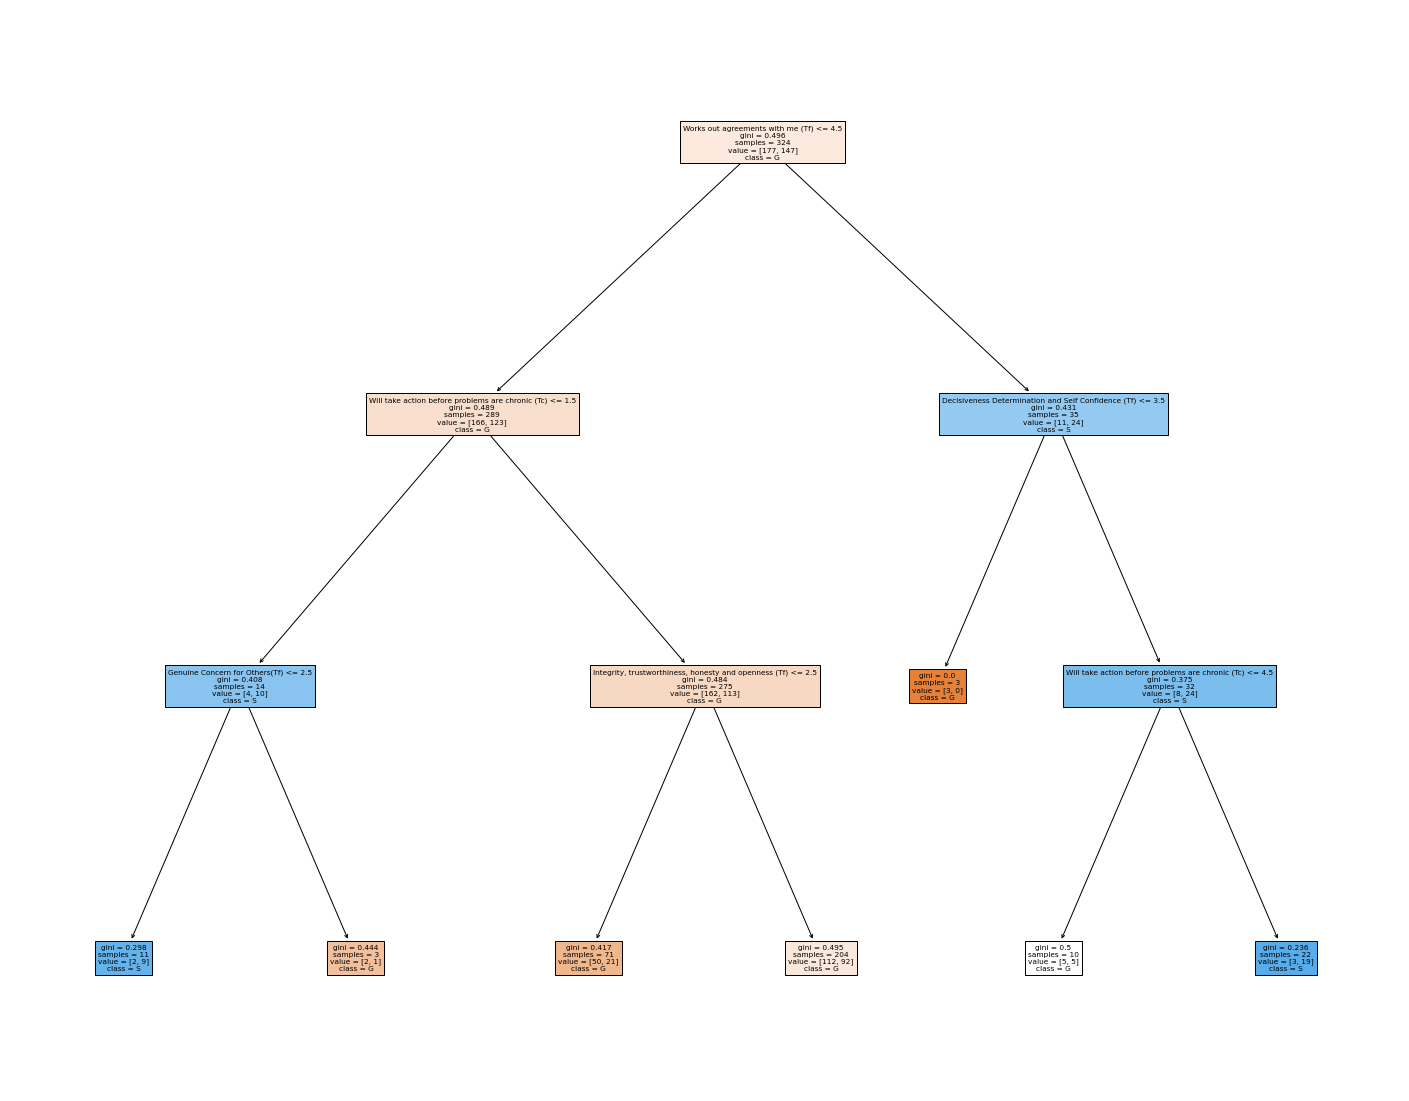

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=Y.unique(),
                   filled=True)

In [ ]:
data_G = data_[data_["Led By (G = Generalists (IAS)/ S= Speacialists(All other services)"]=="G"]
data_S = data_[data_["Led By (G = Generalists (IAS)/ S= Speacialists(All other services)"]=="S"]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def freq_plot(columns):
  data_G = data_[data_["Led By (G = Generalists (IAS)/ S= Speacialists(All other services)"]=="G"]
  data_S = data_[data_["Led By (G = Generalists (IAS)/ S= Speacialists(All other services)"]=="S"]
  a = data_G[columns]
  b = data_S[columns]
  a_count=dict(Counter(a))
  b_count=dict(Counter(b))
  a_lis=list(a_count.values())
  b_lis=list(b_count.values())
  val = np.array(list(a_count.keys()))
  width = 0.40
  plt.bar(val-0.2, a_lis, width,label="G")
  plt.bar(val+0.2, b_lis, width,label="S")
  plt.xlabel("Rating")
  plt.ylabel("Frequency")
  plt.legend()
  plt.show()
  return 


In [ ]:
data_.columns

Index(['Led By (G = Generalists (IAS)/ S= Speacialists(All other services)',
       'Genuine Concern for Others(Tf)',
       'Spends time teaching and coaching (Tf)',
       'Political Sensitivity and Skills(Tc)',
       'Decisiveness Determination and Self Confidence (Tf)',
       'Integrity, trustworthiness, honesty and openness (Tf)',
       'Networks with different offices to get the work done (Tc)',
       'Accessibility and approachibility (Tc)',
       'Encourages me to think more creatively (Tf)',
       'Gets me to rethink never questioned ideas(Tf)',
       'Tell us standards to carry out the work(Tc)',
       'Views me as having different needs, abilities, and aspirations (Tf)',
       'Monitors my performance and keeps track of mistake (Tc)',
       'Will take action before problems are chronic (Tc)',
       'Scope of Corrupt Practices (Tc)', 'Works out agreements with me (Tf)'],
      dtype='object')

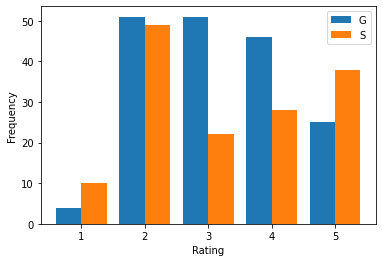

In [ ]:
freq_plot('Will take action before problems are chronic (Tc)')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
Y=Y.replace({"G":0,"S":1})


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print(sklearn.metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        37
           1       0.50      0.43      0.46        28

    accuracy                           0.57        65
   macro avg       0.55      0.55      0.55        65
weighted avg       0.56      0.57      0.56        65



In [ ]:
coefs = model.coef_[0]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

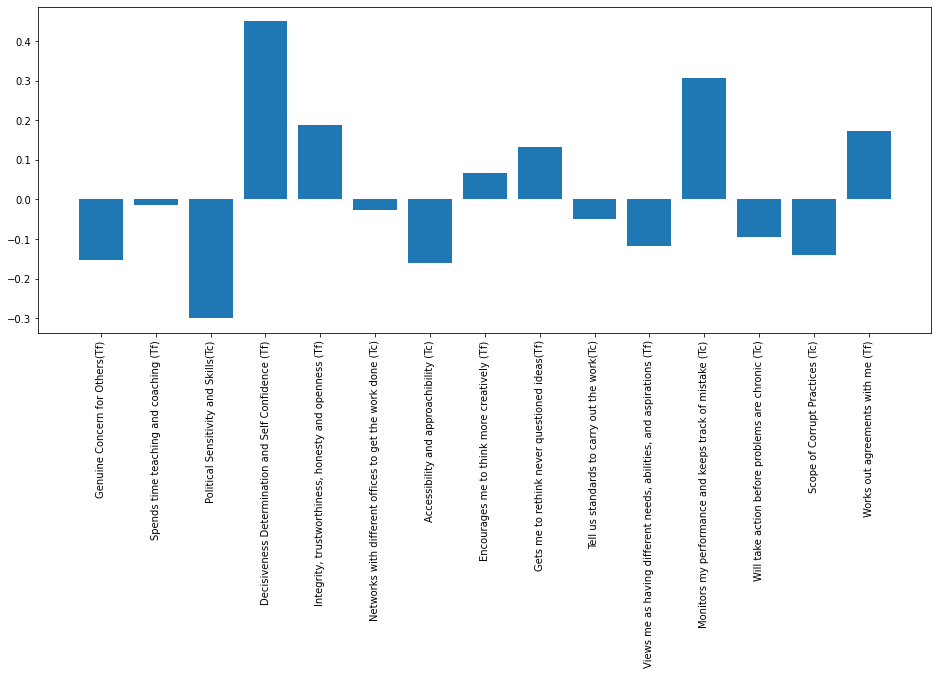

In [ ]:
plt.figure(figsize=(16,6))
plt.bar([i for i in data_.columns[1:]],coefs)
label=list(data_.columns)
plt.xticks(rotation=90)

In [ ]:
data_.to_excel("HRD.xlsx")